In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopy.geocoders


In [2]:
csv_path = 'combined data_1002.csv'
master_data = pd.read_csv(csv_path)
master_df = pd.DataFrame(master_data)
master_df.columns

Index(['Unnamed: 0', 'date', 'home_team', 'away_team', 'home_score',
       'away_score', 'tournament', 'city', 'country', 'neutral', 'year',
       'month', 'goal_diff', 'home_result', 'lat', 'lng', 'host_continent',
       'home_continent', 'away_continent', 'result', 'results', 'total_goals'],
      dtype='object')

In [3]:
master_df.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,...,goal_diff,home_result,lat,lng,host_continent,home_continent,away_continent,result,results,total_goals
0,0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,...,0,Tie,NaN,NaN,Europe,Europe,Europe,NaN,Tie,0
1,1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,...,2,win,NaN,NaN,Europe,Europe,Europe,NaN,England,6
2,2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,...,1,win,NaN,NaN,Europe,Europe,Europe,NaN,Scotland,3
3,3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,...,0,Tie,NaN,NaN,Europe,Europe,Europe,NaN,Tie,4
4,4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,...,3,win,NaN,NaN,Europe,Europe,Europe,NaN,Scotland,3


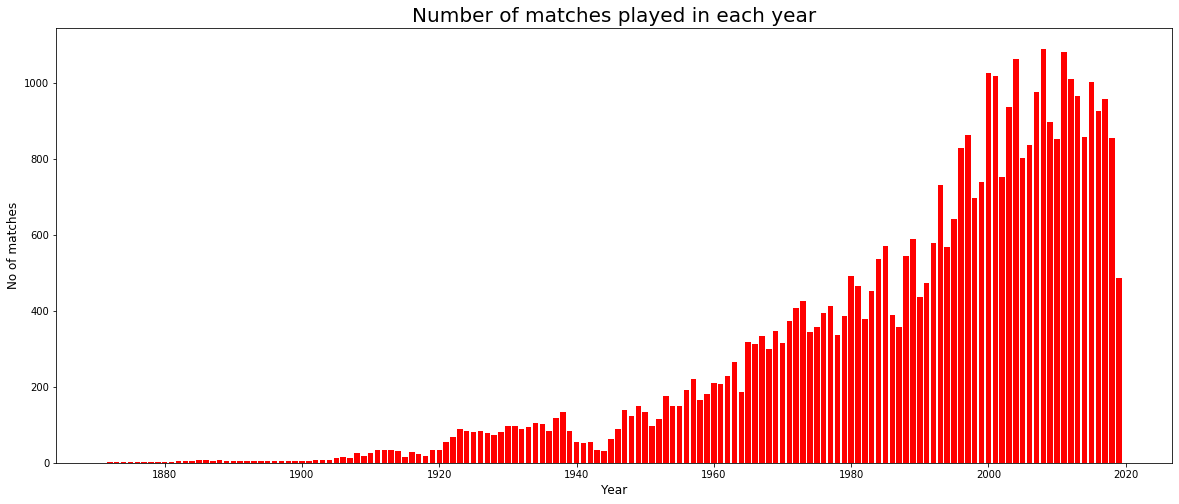

In [4]:
match_count = master_df['year'].value_counts()
match_count.head(2)
plt.figure(figsize=(20,8))
plt.bar(match_count.index, match_count.values, color='red')
plt.title('Number of matches played in each year', fontsize=20)
plt.ylabel('No of matches', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.show()

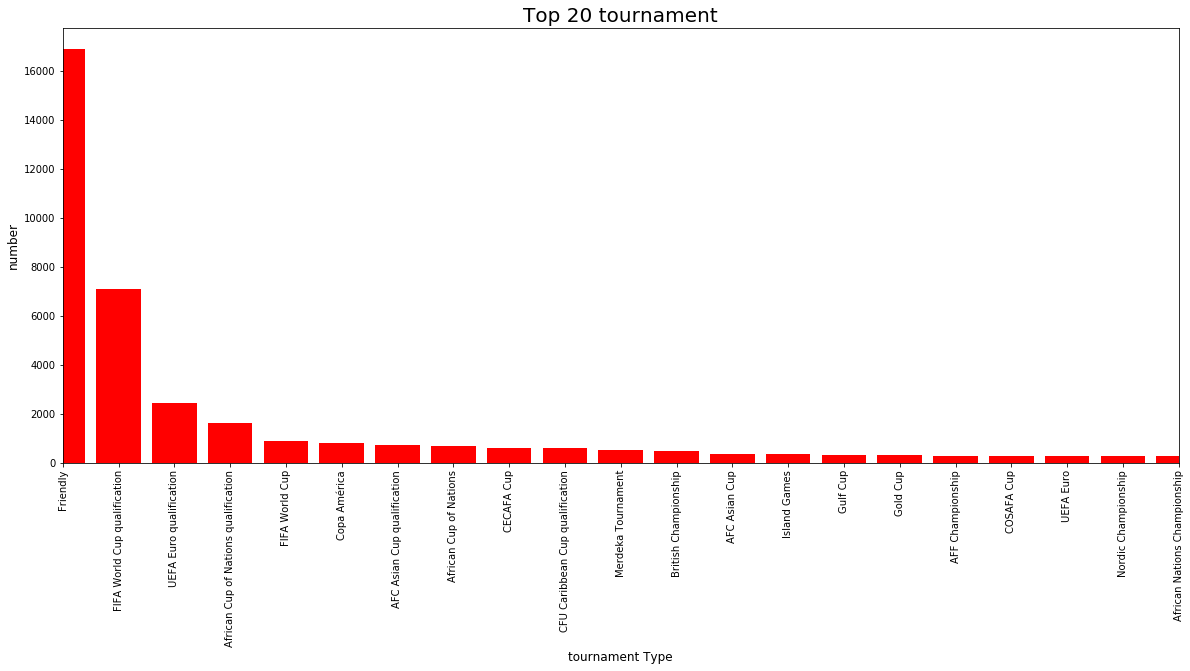

In [5]:
match_count = master_df['tournament'].value_counts()
plt.figure(figsize=(20,8))
plt.bar(match_count.index, match_count.values, color='red',label=match_count.index)
plt.title('Top 20 tournament', fontsize=20)
plt.ylabel('number', fontsize=12)
plt.xlabel('tournament Type', fontsize=12)
plt.xlim(0,20)
plt.xticks(rotation=90)


plt.show()

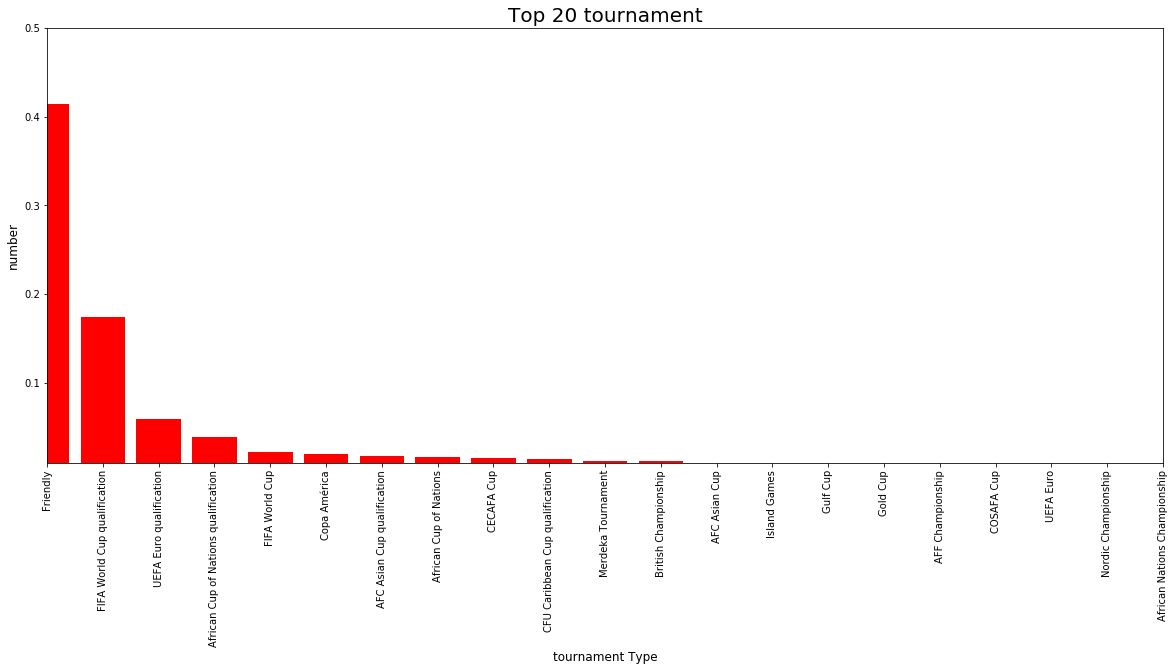

In [6]:

match_number=pd.DataFrame(match_count)
t_sum=match_number.sum()
match_number["percent"]=match_number["tournament"].apply(lambda x:x/t_sum)
match_number
plt.figure(figsize=(20,8))

plt.bar(match_number.index, match_number["percent"], color='red',label=match_count.index)
plt.title('Top 20 tournament', fontsize=20)
plt.ylabel('number', fontsize=12)
plt.xlabel('tournament Type', fontsize=12)
plt.xlim(0,20)
plt.ylim(.01,.5)
plt.xticks(rotation=90)


plt.show()

In [7]:
bins = [0,1950,1960,1970,1980,1990,2000,2010,2020]
labels = ['before 50',"50's","60's","70's","80's","90's","2000's","2010's"]
master_df['era'] = pd.cut(master_df['year'], bins=bins, labels=labels)
master_df.tail()


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,...,home_result,lat,lng,host_continent,home_continent,away_continent,result,results,total_goals,era
40834,40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True,...,win,NaN,NaN,Oceania,Oceania,Oceania,NaN,American Samoa,9,2010's
40835,40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True,...,Tie,NaN,NaN,Oceania,Oceania,Oceania,NaN,Tie,8,2010's
40836,40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,...,lose,NaN,NaN,Africa,Africa,Africa,NaN,Algeria,1,2010's
40837,40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,...,lose,NaN,NaN,Asia,Asia,Asia,NaN,North Korea,1,2010's
40838,40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True,...,Tie,NaN,NaN,Oceania,Oceania,Oceania,NaN,Tie,2,2010's


In [8]:
era_tour_pd=pd.DataFrame(master_df.groupby(["era"])['tournament'].value_counts())

era_tour_pd.columns=["count_game"]
era_tour_pd.head(20)
#n=pd.DataFrame.pivot(era_tour_pd,index=['era'],columns=['tournament'],values=["count_game"])
n=pd.DataFrame.unstack(era_tour_pd,level=-2)
n.fillna(0)



count_game                       \
era                                         before 50   50's   60's   70's   
tournament                                                                   
ABCS Tournament                                   0.0    0.0    0.0    0.0   
AFC Asian Cup                                     0.0   12.0   16.0   47.0   
AFC Asian Cup qualification                       0.0   18.0   20.0   73.0   
AFC Challenge Cup                                 0.0    0.0    0.0    0.0   
AFC Challenge Cup qualification                   0.0    0.0    0.0    0.0   
AFF Championship                                  0.0    0.0    0.0    0.0   
AFF Championship qualification                    0.0    0.0    0.0    0.0   
African Cup of Nations                            0.0    5.0   52.0   83.0   
African Cup of Nations qualification              0.0    0.0   81.0   65.0   
African Nations Championship                      0.0    0.0    0.0    0.0   
Amílcar Cabral Cup                                0.0    0.0    0.0   23.0   
Atlantic Cup                                      0.0    9.0    0.0    2.0   
Atlantic Heritage Cup                             0.0    0.0    0.0    0.0   
Balkan Cup                                       71.0    0.0    0.0   16.0   
Baltic Cup                                       36.0    0.0    0.0    0.0   
Brazil Independence Cup                           0.0    0.0    0.0   37.0   
British Championship                            322.0   53.0   44.0   60.0   
CCCF Championship                                56.0   57.0   10.0    0.0   
CECAFA Cup                                        0.0    0.0    0.0   81.0   
CFU Caribbean Cup                                 0.0    0.0    0.0   11.0   
CFU Caribbean Cup qualification                   0.0    0.0    0.0   26.0   
CONCACAF Championship                             0.0    0.0   39.0   10.0   
CONCACAF Championship qualification               0.0    0.0   16.0    5.0   
CONIFA European Football Cup                      0.0    0.0    0.0    0.0   
CONIFA World Football Cup                         0.0    0.0    0.0    0.0   
COSAFA Cup                                        0.0    0.0    0.0    0.0   
Confederations Cup                                0.0    0.0    0.0    0.0   
Copa América                                    238.0  104.0   40.0   50.0   
Copa América qualification                        0.0    0.0    0.0    0.0   
Copa Artigas                                      0.0    0.0    5.0    4.0   
...                                               ...    ...    ...    ...   
Nordic Championship                             104.0   58.0   58.0   42.0   
OSN Cup                                           0.0    0.0    0.0    0.0   
Oceania Nations Cup                               0.0    0.0    0.0   26.0   
Oceania Nations Cup qualification                 0.0    0.0    0.0    0.0   
Pacific Games                                     0.0    0.0    0.0    0.0   
Pan American Championship                         0.0   39.0    0.0    0.0   
Prime Minister's Cup                              0.0    0.0    0.0    0.0   
Rous Cup                                          0.0    0.0    0.0    0.0   
SAFF Cup                                          0.0    0.0    0.0    0.0   
SKN Football Festival                             0.0    0.0    0.0    0.0   
Simba Tournament                                  0.0    0.0    0.0    0.0   
South Pacific Games                               0.0    0.0   32.0   50.0   
Tournoi de France                                 0.0    0.0    0.0    0.0   
UAFA Cup                                          0.0    0.0   35.0    0.0   
UAFA Cup qualification                            0.0    0.0    0.0    0.0   
UDEAC Cup                                         0.0    0.0    0.0    0.0   
UEFA Euro                                         0.0    4.0    9.0   22.0   
UEFA Euro qualification                           0.0   24.0  173

In [9]:
n.count(axis=0,numeric_only=True)

            era      
count_game  before 50    19
            50's         24
            60's         36
            70's         45
            85's         41
            90's         53
            2000's       54
            2010's       55
dtype: int64

In [12]:
def home_wins(row):
        if  row['home_team'] == row['results']:
            return("Home")
        elif  row['results'] == 'Tie':
            return("Tie")
        else:
            return("Away")
        
            
master_df['home_win_adv'] = pd.DataFrame(master_df[['home_team','results','neutral']].apply(home_wins,axis=1))
master_df.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,...,lat,lng,host_continent,home_continent,away_continent,result,results,total_goals,era,home_win_adv
0,0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,...,NaN,NaN,Europe,Europe,Europe,NaN,Tie,0,before 50,Tie
1,1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,...,NaN,NaN,Europe,Europe,Europe,NaN,England,6,before 50,Home
2,2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,...,NaN,NaN,Europe,Europe,Europe,NaN,Scotland,3,before 50,Home
3,3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,...,NaN,NaN,Europe,Europe,Europe,NaN,Tie,4,before 50,Tie
4,4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,...,NaN,NaN,Europe,Europe,Europe,NaN,Scotland,3,before 50,Home


In [15]:
home_pref=pd.DataFrame.pivot_table(master_df,values=['date'],index=['neutral'],columns=['home_win_adv'],aggfunc='count')
home_pref


date             
home_win_adv  Away   Home   Tie
neutral                        
False         8086  15481  7113
True          3458   4383  2318

In [48]:
#print(home_pref.columns)
#print (home_pref.index)
print (home_pref.iloc[:, home_pref.columns.get_level_values(1)=='Away'])

              date
home_win_adv  Away
neutral           
False         8086
True          3458


In [45]:
x=np.array([1,2])
x

array([1, 2])

In [49]:
# plt.figure(figsize=(10,10))
# #plt.xticks([0,1],["True","False"])
# x=np.array(["True","False"])
# plt.bar(x,home_pref.iloc[:, home_pref.columns.get_level_values(1)=='Away'])

# plt.title('Home vs Away wins', fontsize=20)
# plt.ylabel('No of wins', fontsize=12)
# plt.xlabel('Home or Away', fontsize=12)

# plt.show()

In [42]:
home_pref1=pd.DataFrame(master_df.groupby(['neutral'])['home_win_adv'].value_counts())
home_pref1

home_win_adv
neutral home_win_adv              
False   Home                 15481
        Away                  8086
        Tie                   7113
True    Home                  4383
        Away                  3458
        Tie                   2318

In [55]:
csv_path2 = 'Countries of the world-f.csv'
country_data = pd.read_csv(csv_path2)
country_df = pd.DataFrame(country_data)
country_com_df=country_df.loc[:,['Country','Region','Population','Area','Pop. Density','GDP','Literacy']]
country_com_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 7 columns):
Country         227 non-null object
Region          227 non-null object
Population      227 non-null int64
Area            227 non-null int64
Pop. Density    227 non-null float64
GDP             226 non-null float64
Literacy        209 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 12.5+ KB


In [128]:
fifa_cup_only=master_df.loc[master_df['tournament']=='FIFA World Cup']
fifa_cup_only1=fifa_cup_only.iloc[:,[1,2,3,4,5,7,8,-3]]
fifa_cup_only2=fifa_cup_only.iloc[:,[1,2,3,4,5,7,8,-3]]



In [129]:
fifa_cup_only1.rename(columns={'home_team': 'team', 'away_team': 'opponent',
                              'home_score': 'team_score','away_score': 'opp_score'}, inplace=True)
#fifa_cup_only1.reset_index(inplace=True,drop=True)
fifa_cup_only1.set_index(['date','team'],inplace=True,drop=True)
fifa_cup_only1.head()

opponent  team_score  opp_score        city  \
date       team                                                          
1930-07-13 Belgium    United States           0          3  Montevideo   
           France            Mexico           4          1  Montevideo   
1930-07-14 Brazil        Yugoslavia           1          2  Montevideo   
           Peru             Romania           1          3  Montevideo   
1930-07-15 Argentina         France           1          0  Montevideo   

                      country  total_goals  
date       team                             
1930-07-13 Belgium    Uruguay            3  
           France     Uruguay            5  
1930-07-14 Brazil     Uruguay            3  
           Peru       Uruguay            4  
1930-07-15 Argentina  Uruguay            1

In [130]:
fifa_cup_only2.rename(columns={ 'away_team': 'team','home_team': 'opponent'
                              ,'away_score': 'team_score','home_score': 'opp_score'}, inplace=True)

#fifa_cup_only2.reset_index(inplace=True,drop=True)
fifa_cup_only2.set_index(['date','team'],inplace=True,drop=True)
fifa_cup_only2.head()

opponent  opp_score  team_score        city  \
date       team                                                          
1930-07-13 United States    Belgium          0           3  Montevideo   
           Mexico            France          4           1  Montevideo   
1930-07-14 Yugoslavia        Brazil          1           2  Montevideo   
           Romania             Peru          1           3  Montevideo   
1930-07-15 France         Argentina          1           0  Montevideo   

                          country  total_goals  
date       team                                 
1930-07-13 United States  Uruguay            3  
           Mexico         Uruguay            5  
1930-07-14 Yugoslavia     Uruguay            3  
           Romania        Uruguay            4  
1930-07-15 France         Uruguay            1

In [131]:
frames = [fifa_cup_only1,fifa_cup_only2]

fifa_team = pd.concat(frames,sort=True)
#fifa_team.reset_index(i)
fifa_team.head()

city  country  opp_score       opponent  \
date       team                                                       
1930-07-13 Belgium    Montevideo  Uruguay          3  United States   
           France     Montevideo  Uruguay          1         Mexico   
1930-07-14 Brazil     Montevideo  Uruguay          2     Yugoslavia   
           Peru       Montevideo  Uruguay          3        Romania   
1930-07-15 Argentina  Montevideo  Uruguay          0         France   

                      team_score  total_goals  
date       team                                
1930-07-13 Belgium             0            3  
           France              4            5  
1930-07-14 Brazil              1            3  
           Peru                1            4  
1930-07-15 Argentina           1            1